<a href="https://colab.research.google.com/github/ankitameher2006/Credit_Card_Fraud_Detection/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **💳 Credit Card Fraud Detection Project**
Detecting fraudulent transactions using machine learning techniques.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings('ignore')

In [5]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [6]:
df = pd.read_csv("creditcard.csv")
print("Shape of dataset:", df.shape)
df.head()

Shape of dataset: (13954, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


2


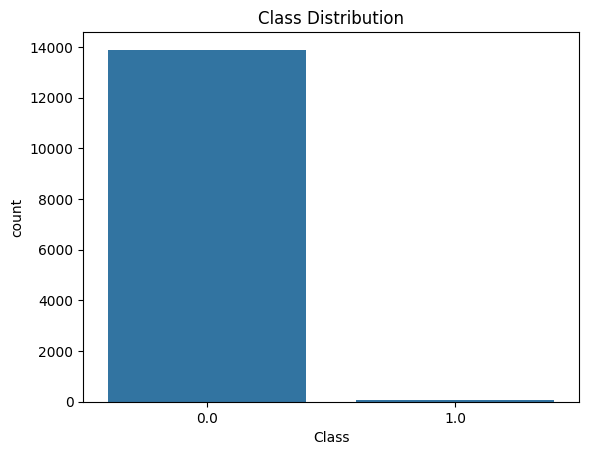

               Time            V1            V2            V3            V4  \
count  13954.000000  13954.000000  13954.000000  13954.000000  13954.000000   
mean   10121.161817     -0.235676      0.284287      0.846047      0.302775   
std     7739.625811      1.720315      1.394804      1.561376      1.500595   
min        0.000000    -27.670569    -34.607649    -24.667741     -4.657545   
25%     2984.250000     -0.969786     -0.282728      0.407297     -0.623141   
50%     9086.500000     -0.319439      0.252904      0.960978      0.220104   
75%    17103.500000      1.162662      0.884741      1.607031      1.198942   
max    24759.000000      1.960497     10.558600      4.101716     11.927512   

                 V5            V6            V7            V8            V9  \
count  13954.000000  13954.000000  13954.000000  13954.000000  13954.000000   
mean      -0.118730      0.128013     -0.157297     -0.016148      0.989827   
std        1.289494      1.320395      1.238583    

In [7]:
print(df.isnull().sum().sum())
sns.countplot(x='Class', data=df)
plt.title("Class Distribution")
plt.show()
print(df.describe())

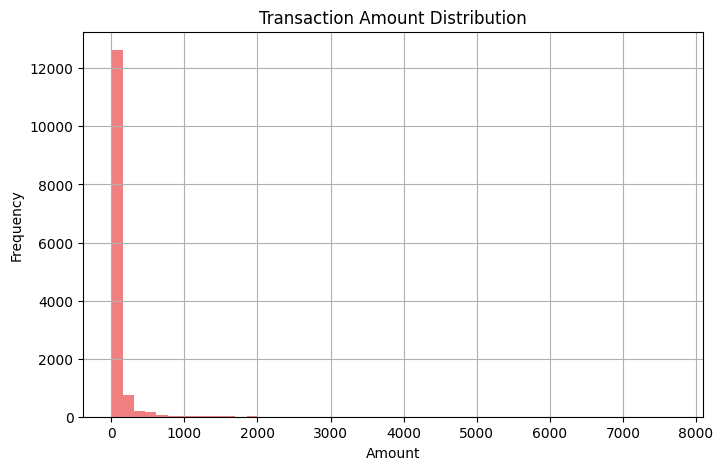

In [8]:
plt.figure(figsize=(8,5))
df['Amount'].hist(bins=50, color='lightcoral')
plt.title("Transaction Amount Distribution")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show()

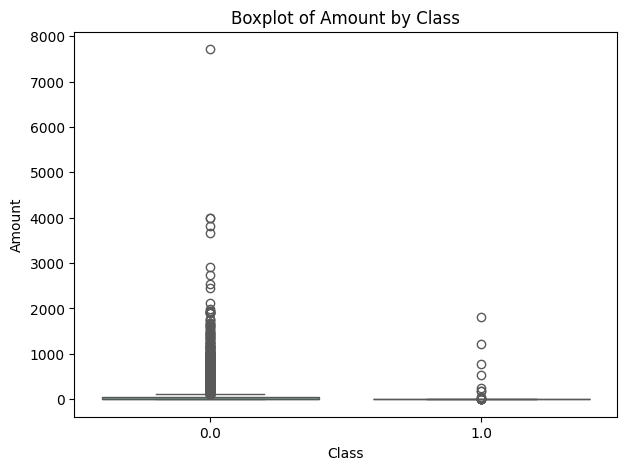

In [9]:
plt.figure(figsize=(7,5))
sns.boxplot(x='Class', y='Amount', data=df, palette="Set2")
plt.title("Boxplot of Amount by Class")
plt.show()

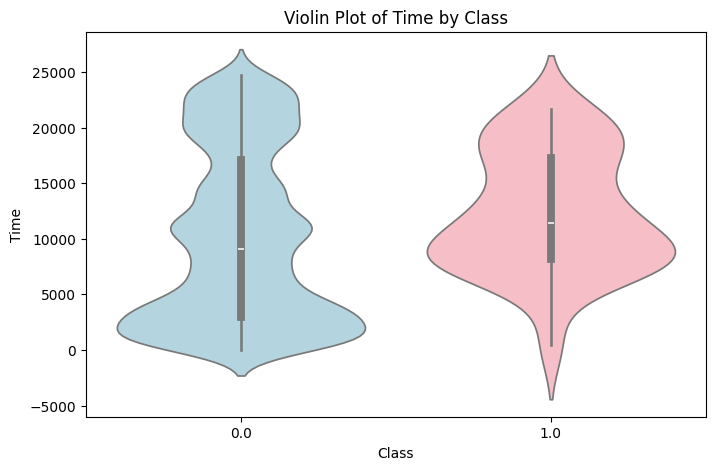

In [10]:
plt.figure(figsize=(8,5))
sns.violinplot(x='Class', y='Time', data=df, palette=["lightblue", "lightpink"])
plt.title("Violin Plot of Time by Class")
plt.show()

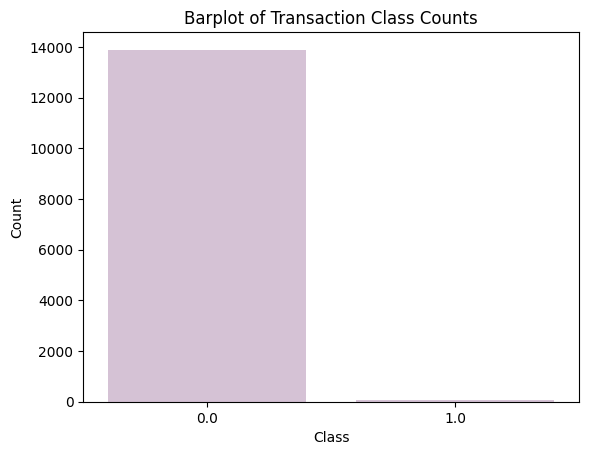

In [11]:
sns.barplot(x=df['Class'].value_counts().index, y=df['Class'].value_counts().values, color="thistle")
plt.title("Barplot of Transaction Class Counts")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

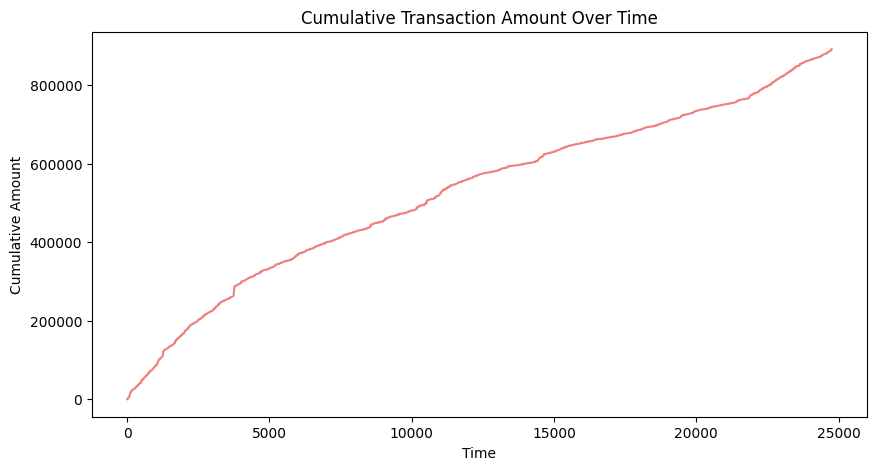

In [12]:
df_sorted = df.sort_values(by='Time')
df_sorted['Cumulative_Amount'] = df_sorted['Amount'].cumsum()
plt.figure(figsize=(10,5))
plt.plot(df_sorted['Time'], df_sorted['Cumulative_Amount'], color='lightcoral')
plt.title("Cumulative Transaction Amount Over Time")
plt.xlabel("Time")
plt.ylabel("Cumulative Amount")
plt.show()

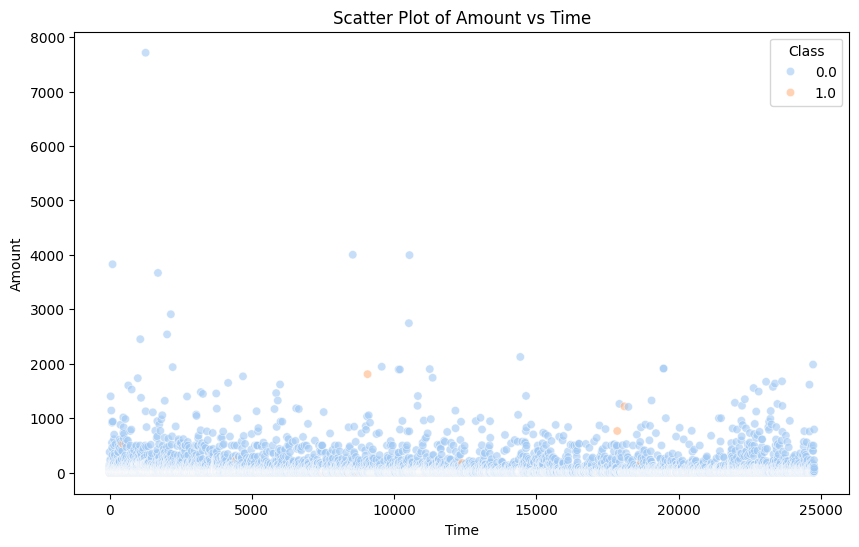

In [13]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Time', y='Amount', hue='Class', data=df, palette='pastel', alpha=0.6)
plt.title("Scatter Plot of Amount vs Time")
plt.show()

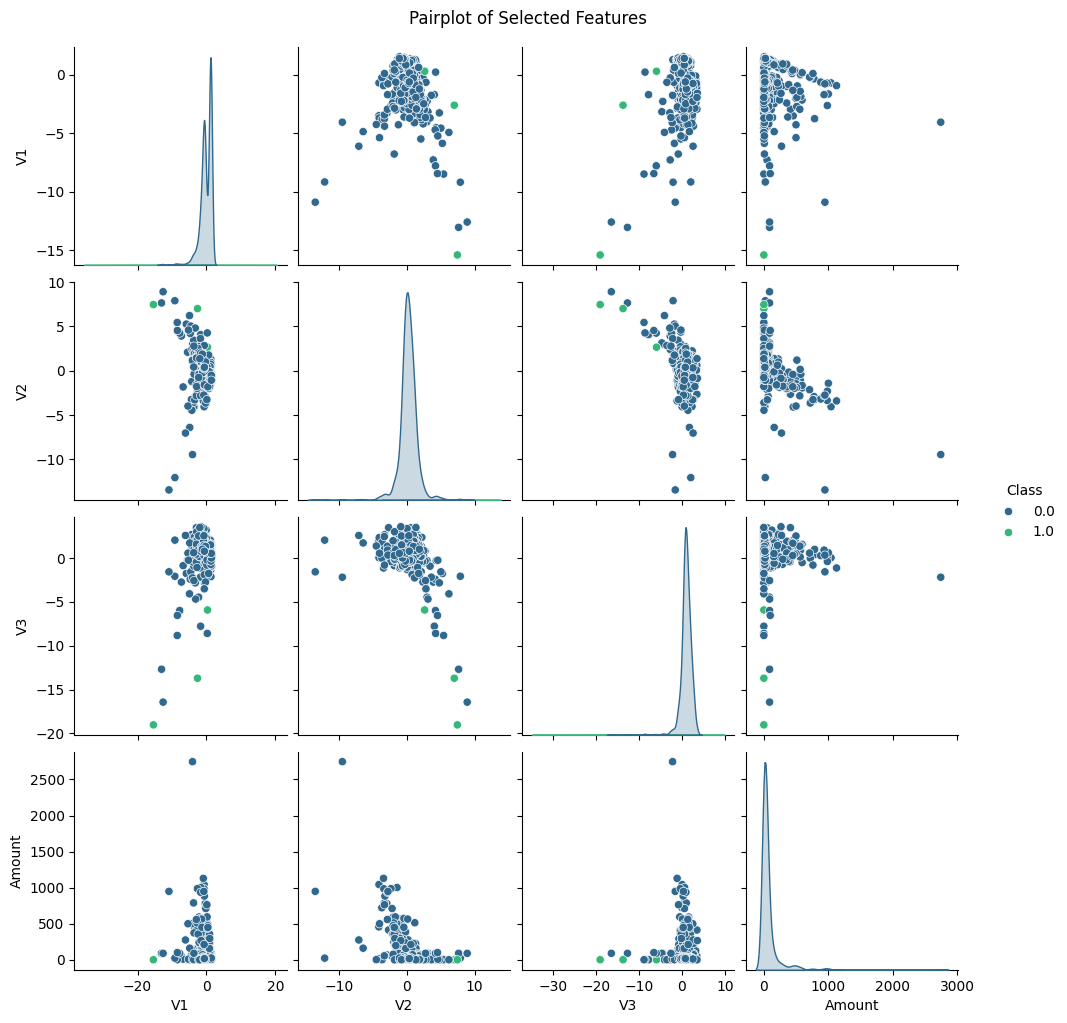

In [14]:
sample_df = df.sample(n=1000, random_state=42)
sns.pairplot(sample_df[['V1', 'V2', 'V3', 'Amount', 'Class']], hue='Class', palette='viridis')
plt.suptitle("Pairplot of Selected Features", y=1.02)
plt.show()

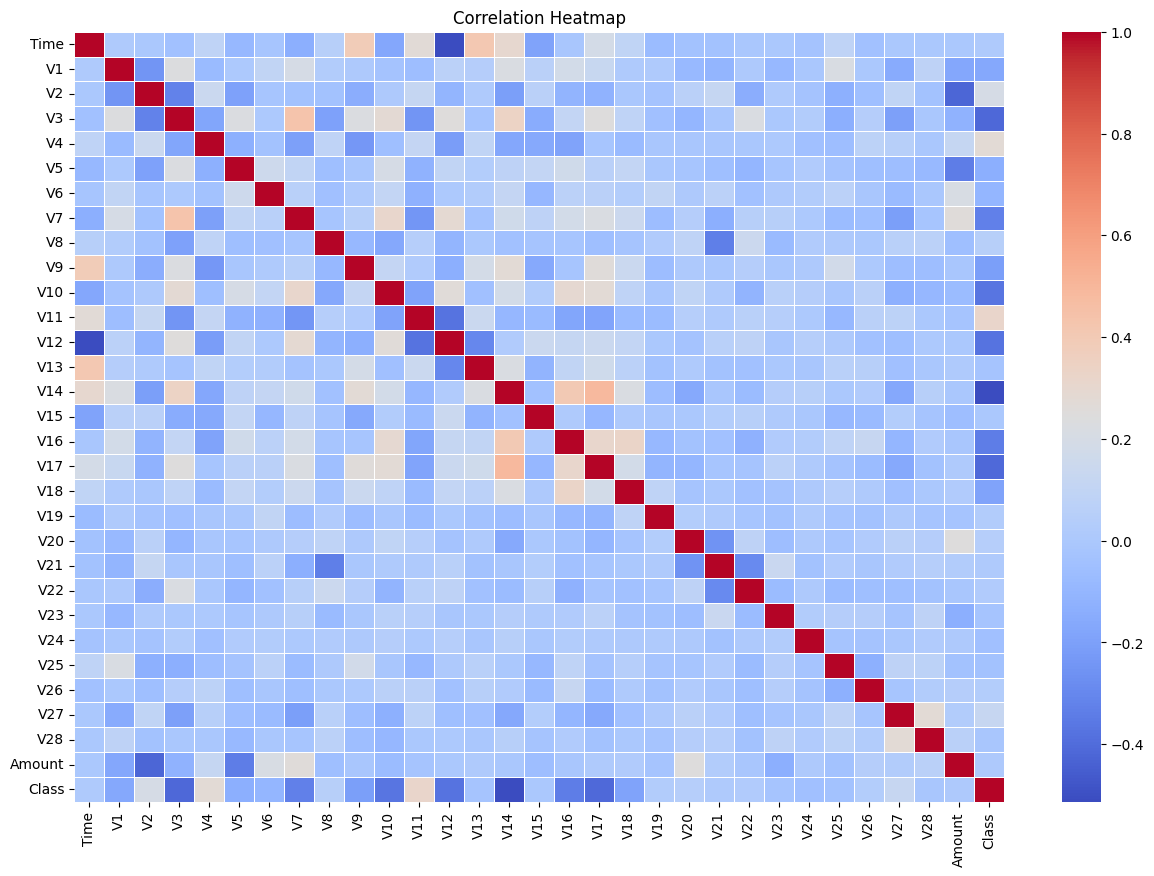

In [15]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [16]:
df = df.dropna(subset=['Class'])

X = df.drop('Class', axis=1)
y = df['Class']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, stratify=y, random_state=42)


In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)


models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'SVM': SVC(kernel='rbf', probability=True)
}


model_results = {}

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    model_results[name] = [acc, prec, rec, f1]

Training Logistic Regression...
Training Random Forest...
Training XGBoost...
Training SVM...


In [18]:
results_df = pd.DataFrame(model_results, index=['Accuracy', 'Precision', 'Recall', 'F1 Score']).T
results_df.sort_values(by='F1 Score', ascending=False)

,Accuracy,Precision,Recall,F1 Score
XGBoost,0.999642,1.000000,0.909091,0.952381
Random Forest,0.999283,0.909091,0.909091,0.909091
Logistic Regression,0.999283,1.000000,0.818182,0.900000
SVM,0.998925,1.000000,0.727273,0.842105


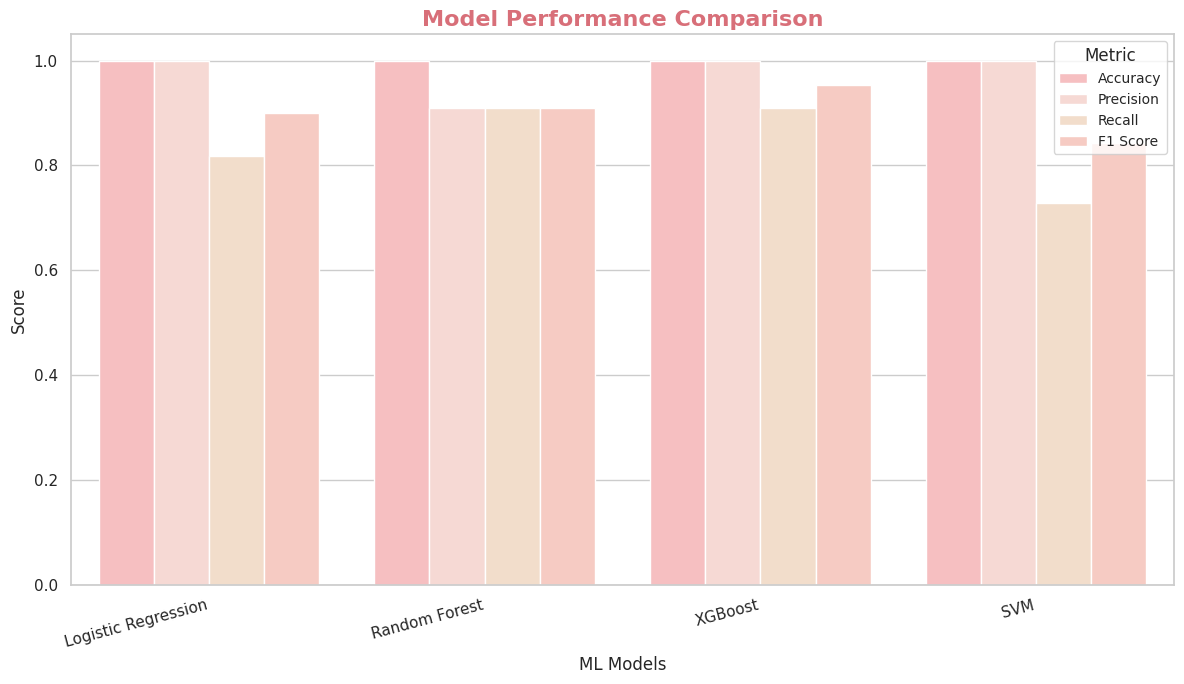

In [19]:
sns.set(style="whitegrid")
results_melted = results_df.reset_index().melt(id_vars='index')
results_melted.columns = ['Model', 'Metric', 'Score']
pink_peach_palette = ["#ffb6b9", "#fcd5ce", "#f9dcc4", "#fec5bb"]
plt.figure(figsize=(12, 7))
sns.barplot(
    data=results_melted,
    x='Model',
    y='Score',
    hue='Metric',
    palette=pink_peach_palette
)

plt.title("Model Performance Comparison", fontsize=16, fontweight='bold', color="#d86f79")
plt.ylabel("Score", fontsize=12)
plt.xlabel("ML Models", fontsize=12)
plt.xticks(rotation=15, ha='right', fontsize=11)
plt.yticks(fontsize=11)
plt.legend(title='Metric', loc='upper right', fontsize=10)
plt.tight_layout()
plt.show()

In [20]:
df['Class'].isna().sum()

0

In [21]:
X = df.drop('Class', axis=1)
y = df['Class']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, stratify=y, random_state=42)

In [22]:
def evaluate_model(model, name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Model: {name}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("ROC-AUC Score:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))
    print("-" * 50)

models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "LightGBM": LGBMClassifier()
}

for name, model in models.items():
    evaluate_model(model, name)

Model: Logistic Regression
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4169
         1.0       0.80      0.71      0.75        17

    accuracy                           1.00      4186
   macro avg       0.90      0.85      0.87      4186
weighted avg       1.00      1.00      1.00      4186

Confusion Matrix:
 [[4166    3]
 [   5   12]]
Accuracy: 0.998088867654085
ROC-AUC Score: 0.9929874564361605
--------------------------------------------------
Model: Random Forest
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4169
         1.0       0.94      0.88      0.91        17

    accuracy                           1.00      4186
   macro avg       0.97      0.94      0.95      4186
weighted avg       1.00      1.00      1.00      4186

Confusion Matrix:
 [[4168    1]
 [   2   15]]
Accuracy: 0.9992833253702819
ROC-AUC Score: 0

[LightGBM] [Info] Number of positive: 39, number of negative: 9728
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005680 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 9767, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.003993 -> initscore=-5.519202
[LightGBM] [Info] Start training from score -5.519202
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

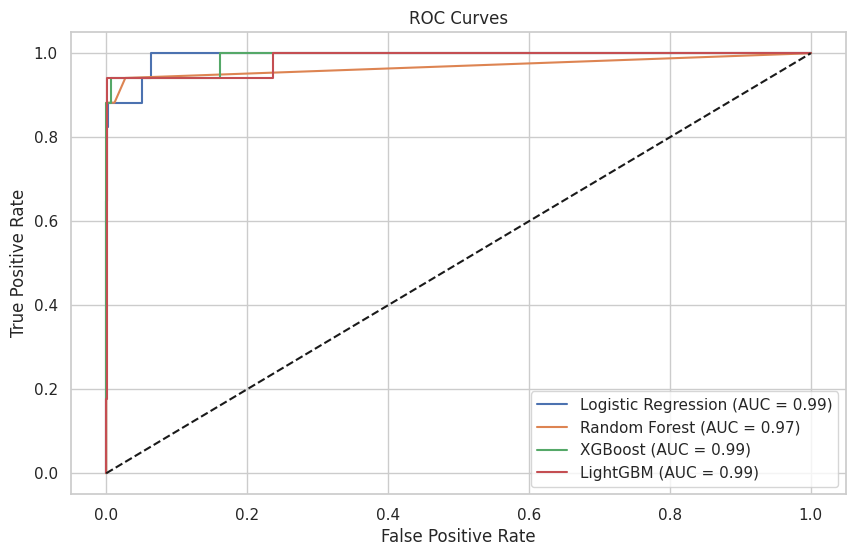

In [23]:
plt.figure(figsize=(10,6))
for name, model in models.items():
    model.fit(X_train, y_train)
    fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc_score(y_test, model.predict_proba(X_test)[:,1]):.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.grid(True)
plt.show()

[LightGBM] [Info] Number of positive: 39, number of negative: 9728
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003901 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 9767, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.003993 -> initscore=-5.519202
[LightGBM] [Info] Start training from score -5.519202
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

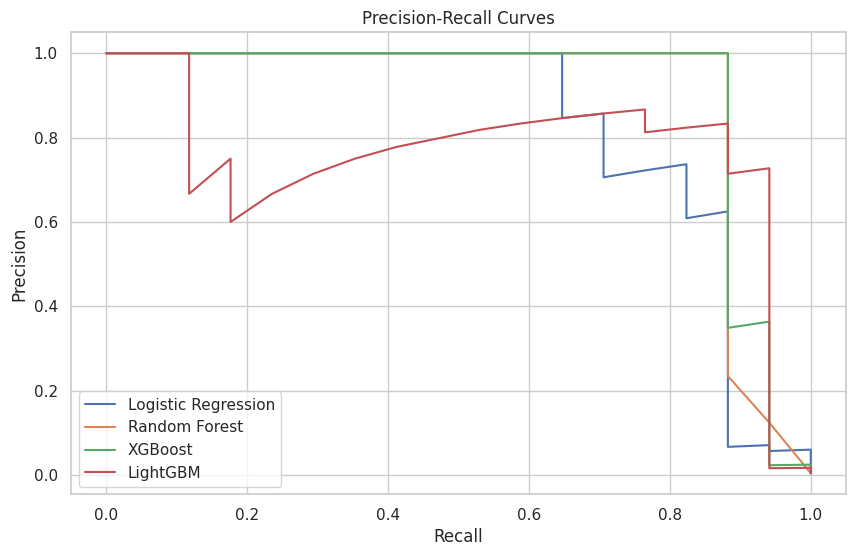

In [24]:
plt.figure(figsize=(10,6))
for name, model in models.items():
    model.fit(X_train, y_train)
    precision, recall, _ = precision_recall_curve(y_test, model.predict_proba(X_test)[:, 1])
    plt.plot(recall, precision, label=name)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves')
plt.legend()
plt.grid(True)
plt.show()

In [25]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for name, model in models.items():
    scores = cross_val_score(model, X_scaled, y, cv=cv, scoring='roc_auc')
    print(f"{name} - Mean ROC-AUC: {scores.mean():.4f}")

Logistic Regression - Mean ROC-AUC: 0.9750
Random Forest - Mean ROC-AUC: 0.9626
XGBoost - Mean ROC-AUC: 0.9888
[LightGBM] [Info] Number of positive: 45, number of negative: 11117
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004139 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 11162, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.004032 -> initscore=-5.509568
[LightGBM] [Info] Start training from score -5.509568
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

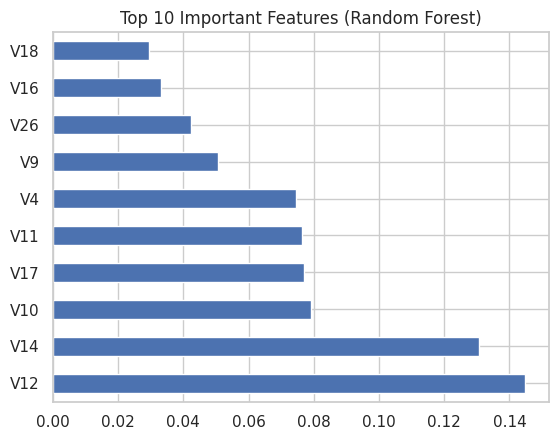

In [26]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
importances = pd.Series(rf.feature_importances_, index=df.columns[:-1])
importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Important Features (Random Forest)")
plt.show()